In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 3.4 MB/s 
     |████████████████████████████████| 47.6 MB 60.4 MB/s 


In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

In [3]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [83]:
Image_path = 'learn.jpg'

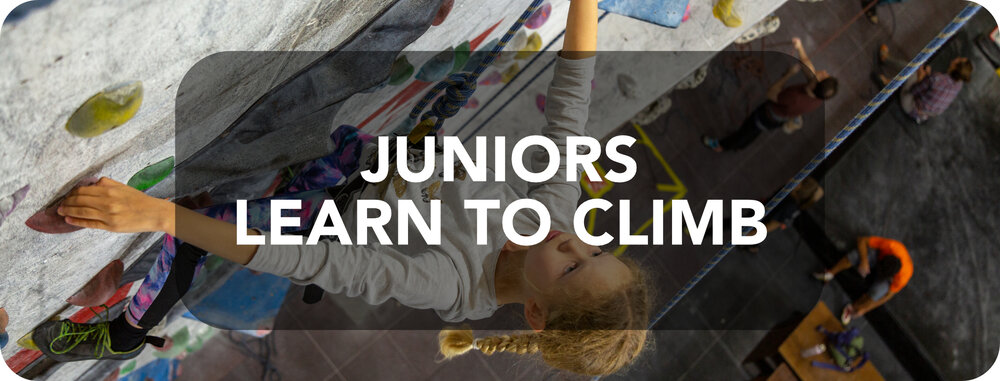

In [84]:
Image(Image_path)

In [85]:
output = reader.readtext(Image_path)

In [62]:
output

[([[0, 48], [476, 48], [476, 200], [0, 200]], 'Linux', 0.9954798474520385)]

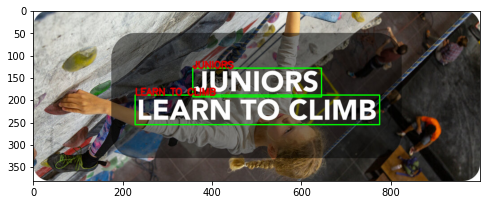

In [88]:
img = cv2.imread(Image_path)
for detect in output:
  top_left = tuple(int(val) for val in  detect[0][0])
  bottom_right = tuple(int(val) for val in  detect[0][2])
  text = detect[1]
  img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
  img = cv2.putText(img, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, .7, (0,0,225), 2, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

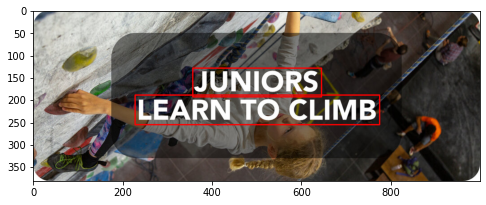

In [89]:
image = cv2.imread(Image_path)
for index in range(len(output)):
  cord = output[index][0]
  x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
  x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
  image = cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)

plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))